# Housing Price Prediction

In [65]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [66]:
#importing data
data = pd.read_csv('House_Rent_Dataset.csv')
data.head()

,Posted On,Size,Rent,No of Bedrooms,No of Bathrooms,Floor,Area Type,City,Condition of the House,Age of House (in Years),Overall Grade,Furnishing Status,Latitude,Longitude,Tenant Preferred,Point of Contact
0,31-05-22,2100,1200.0,3.0,1.75,0.0,Carpet Area,Hyderabad,Fair,61,7.0,Furnished,47.7512,-122.342,Bachelors/Family,Contact Owner
1,24-05-22,200,1500.0,4.0,2.50,0.0,Super Area,Kolkata,Fair,26,9.0,Semi-Furnished,47.3846,-122.169,Bachelors/Family,Contact Owner
2,12-05-22,500,1800.0,3.0,4.25,0.0,Super Area,Kolkata,Fair,18,10.0,Semi-Furnished,47.6336,-122.064,Bachelors/Family,Contact Owner
3,22-06-22,60,2000.0,2.0,1.00,1.0,Super Area,Delhi,Fair,71,7.0,Unfurnished,47.7252,-122.331,Bachelors/Family,Contact Owner
4,05-06-22,550,2200.0,4.0,1.00,0.0,Super Area,Kolkata,Fair,113,8.0,Furnished,47.6354,-122.353,Bachelors/Family,Contact Owner


In [67]:
data['Rent'].describe()

count    4.742000e+03
mean     3.501221e+04
std      7.813578e+04
min      1.200000e+03
25%      1.000000e+04
50%      1.600000e+04
75%      3.300000e+04
max      3.500000e+06
Name: Rent, dtype: float64

<AxesSubplot:ylabel='Frequency'>

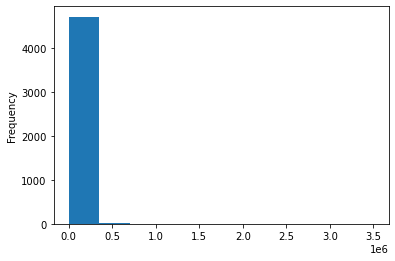

In [68]:
#distribution of target variable
data['Rent'].plot.hist()

In [69]:
# checking quantiles
q1 = data['Rent'].quantile(0.25)
q3 = data['Rent'].quantile(0.75)
q1, q3

(10000.0, 33000.0)

In [70]:
#calculating iqr
iqr = q3 - q1
iqr

23000.0

In [71]:
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
upper_limit, lower_limit

(67500.0, -24500.0)

In [72]:
# imputing outliers
def limit_imputer(value):
  if value > upper_limit:
    return upper_limit
  if value < lower_limit:
    return lower_limit
  else:
    return value

In [73]:
data['Rent'] = data['Rent'].apply(limit_imputer)

In [74]:
data['Rent'].describe()

count     4742.000000
mean     24578.726908
std      19927.548962
min       1200.000000
25%      10000.000000
50%      16000.000000
75%      33000.000000
max      67500.000000
Name: Rent, dtype: float64

<AxesSubplot:ylabel='Frequency'>

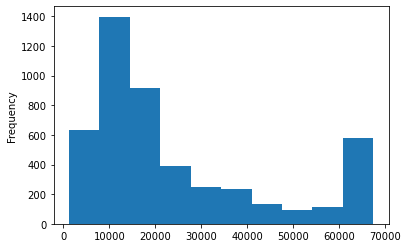

In [75]:
data['Rent'].plot.hist()

In [76]:
#checking missing values
data.isnull().sum()

Posted On                  0
Size                       0
Rent                       4
No of Bedrooms             3
No of Bathrooms            2
Floor                      7
Area Type                  0
City                       0
Condition of the House     0
Age of House (in Years)    0
Overall Grade              3
Furnishing Status          0
Latitude                   1
Longitude                  1
Tenant Preferred           0
Point of Contact           0
dtype: int64

In [77]:
data['Rent'].dropna(inplace=True)
data["Rent"].isnull().sum()

4

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Posted On                4746 non-null   object 
 1   Size                     4746 non-null   int64  
 2   Rent                     4742 non-null   float64
 3   No of Bedrooms           4743 non-null   float64
 4   No of Bathrooms          4744 non-null   float64
 5   Floor                    4739 non-null   float64
 6   Area Type                4746 non-null   object 
 7   City                     4746 non-null   object 
 8   Condition of the House   4746 non-null   object 
 9   Age of House (in Years)  4746 non-null   int64  
 10  Overall Grade            4743 non-null   float64
 11  Furnishing Status        4746 non-null   object 
 12  Latitude                 4745 non-null   float64
 13  Longitude                4745 non-null   float64
 14  Tenant Preferred        

In [79]:
#isolating numerical variables
numerical_columns = ['No of Bathrooms', 'No of Bedrooms', 'Floor',
                     'Overall Grade','Latitude',
                     'Longitude']

In [80]:
#imputing missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Posted On                4746 non-null   object 
 1   Size                     4746 non-null   int64  
 2   Rent                     4742 non-null   float64
 3   No of Bedrooms           4746 non-null   float64
 4   No of Bathrooms          4746 non-null   float64
 5   Floor                    4746 non-null   float64
 6   Area Type                4746 non-null   object 
 7   City                     4746 non-null   object 
 8   Condition of the House   4746 non-null   object 
 9   Age of House (in Years)  4746 non-null   int64  
 10  Overall Grade            4746 non-null   float64
 11  Furnishing Status        4746 non-null   object 
 12  Latitude                 4746 non-null   float64
 13  Longitude                4746 non-null   float64
 14  Tenant Preferred        

In [82]:
#checking missing values
data.isnull().sum()

Posted On                  0
Size                       0
Rent                       4
No of Bedrooms             0
No of Bathrooms            0
Floor                      0
Area Type                  0
City                       0
Condition of the House     0
Age of House (in Years)    0
Overall Grade              0
Furnishing Status          0
Latitude                   0
Longitude                  0
Tenant Preferred           0
Point of Contact           0
dtype: int64

# Other transformations

In [83]:
data['Furnishing Status'].unique()

array(['Furnished', 'Semi-Furnished', 'Unfurnished'], dtype=object)

In [84]:
# converting from string to categorical
mapping = {'Unfurnished' : "0",
           'Semi-Furnished' : '1',
           'Furnished' : '2'}

data['Furnishing Status'] = data['Furnishing Status'].map(mapping)

In [85]:
data['Furnishing Status'].unique()

array(['2', '1', '0'], dtype=object)

In [86]:
data.drop( columns = 'Posted On', inplace = True)

In [87]:
data['Condition of the House'].head(10)

0    Fair
1    Fair
2    Fair
3    Fair
4    Fair
5    Good
6    Fair
7    Good
8    Okay
9    Fair
Name: Condition of the House, dtype: object

In [88]:
data['Condition of the House'].value_counts()

Fair         2832
Good         1354
Excellent     507
Okay           45
Bad             8
Name: Condition of the House, dtype: int64

<AxesSubplot:xlabel='Condition of the House'>

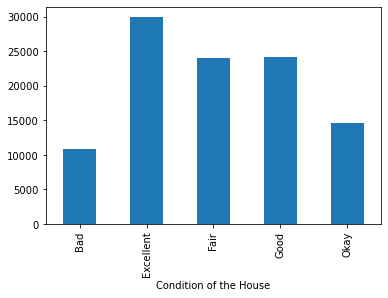

In [89]:
data.groupby('Condition of the House')['Rent'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Condition of the House'>

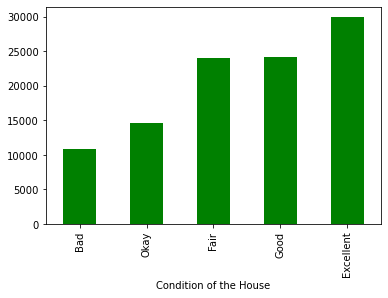

In [90]:
data.groupby('Condition of the House')['Rent'].mean().sort_values().plot(kind = 'bar',color='green')

<AxesSubplot:xlabel='Tenant Preferred'>

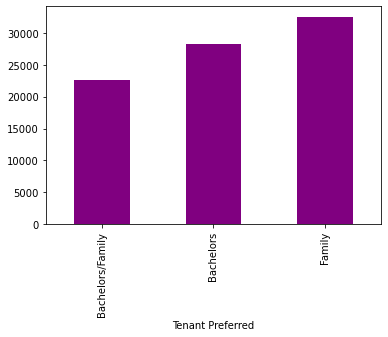

In [91]:
data.groupby('Tenant Preferred')['Rent'].mean().sort_values().plot(kind = 'bar',color='purple')

<AxesSubplot:xlabel='Furnishing Status'>

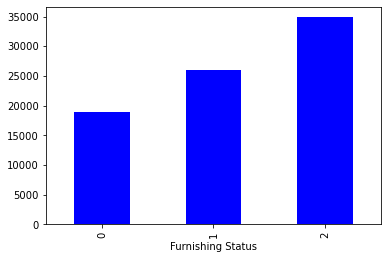

In [92]:
data.groupby('Furnishing Status')['Rent'].mean().sort_values().plot(kind = 'bar',color='blue')

In [93]:
data=pd.get_dummies(data,columns=['City'],drop_first=True)

In [94]:
data.head()

,Size,Rent,No of Bedrooms,No of Bathrooms,Floor,Area Type,Condition of the House,Age of House (in Years),Overall Grade,Furnishing Status,Latitude,Longitude,Tenant Preferred,Point of Contact,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,2100,1200.0,3.0,1.75,0.0,Carpet Area,Fair,61,7.0,2,47.7512,-122.342,Bachelors/Family,Contact Owner,0,0,1,0,0
1,200,1500.0,4.0,2.50,0.0,Super Area,Fair,26,9.0,1,47.3846,-122.169,Bachelors/Family,Contact Owner,0,0,0,1,0
2,500,1800.0,3.0,4.25,0.0,Super Area,Fair,18,10.0,1,47.6336,-122.064,Bachelors/Family,Contact Owner,0,0,0,1,0
3,60,2000.0,2.0,1.00,1.0,Super Area,Fair,71,7.0,0,47.7252,-122.331,Bachelors/Family,Contact Owner,0,1,0,0,0
4,550,2200.0,4.0,1.00,0.0,Super Area,Fair,113,8.0,2,47.6354,-122.353,Bachelors/Family,Contact Owner,0,0,0,1,0


<AxesSubplot:xlabel='Age of House (in Years)'>

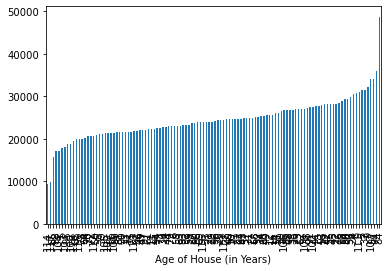

In [95]:
data.groupby('Age of House (in Years)')['Rent'].mean().sort_values().plot(kind = 'bar')

# Linear Regression


In [96]:
data.dropna(inplace=True)
X = data.drop(columns=['Rent'])
Y = data['Rent']

## variable transformation

In [97]:
#checking distribution of independent numerical variables
def distribution(data ,var):
  plt.figure(figsize = (len(var)*6,6), dpi = 120)
  for j,i in enumerate(var):
    plt.subplot(1,len(var),j+1)
    plt.hist(data[i])
    plt.title(i)

In [144]:
numerical_columns = ['Size', 'No of Bedrooms', 'No of Bathrooms',
       'Age of House (in Years)', 'Floor', 'Overall Grade',
       'Latitude', 'Longitude','Furnishing Status']

In [145]:
for i in numerical_columns:
  X[i] = pd.to_numeric(X[i])

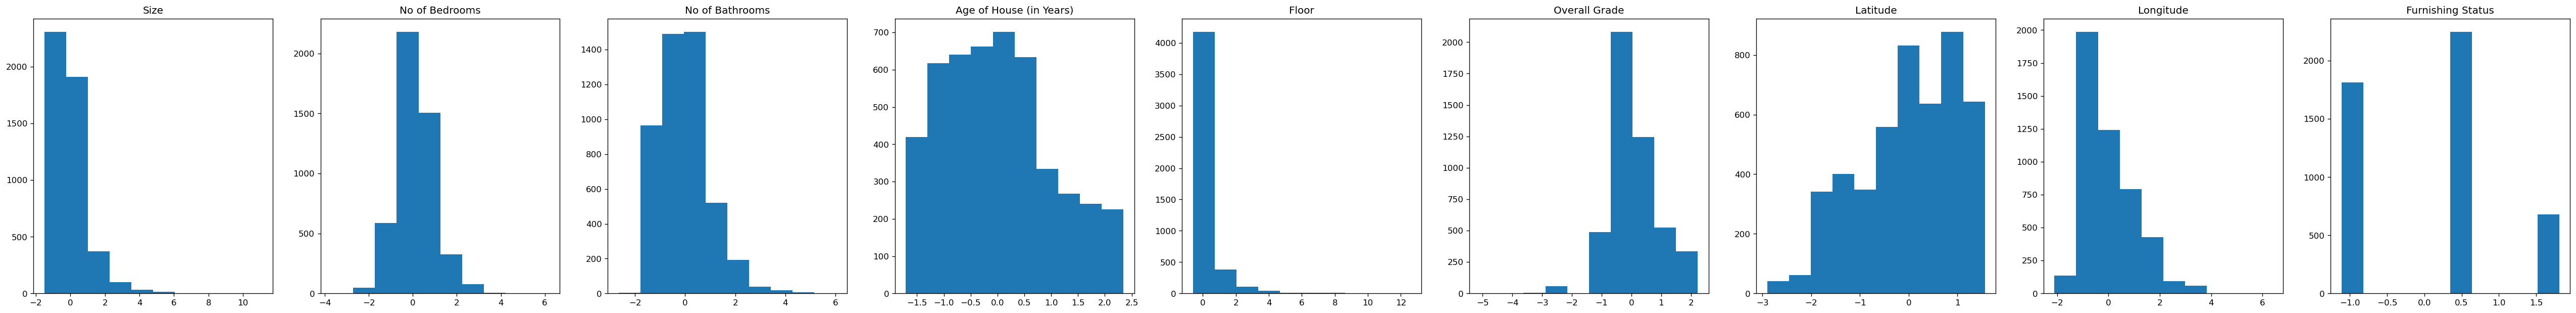

In [146]:
distribution(X, numerical_columns)

## Scaling the dataset

In [101]:
X.head()

,Size,No of Bedrooms,No of Bathrooms,Floor,Area Type,Condition of the House,Age of House (in Years),Overall Grade,Furnishing Status,Latitude,Longitude,Tenant Preferred,Point of Contact,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,2100,3.0,1.75,0.0,Carpet Area,Fair,61,7.0,2,47.7512,-122.342,Bachelors/Family,Contact Owner,0,0,1,0,0
1,200,4.0,2.50,0.0,Super Area,Fair,26,9.0,1,47.3846,-122.169,Bachelors/Family,Contact Owner,0,0,0,1,0
2,500,3.0,4.25,0.0,Super Area,Fair,18,10.0,1,47.6336,-122.064,Bachelors/Family,Contact Owner,0,0,0,1,0
3,60,2.0,1.00,1.0,Super Area,Fair,71,7.0,0,47.7252,-122.331,Bachelors/Family,Contact Owner,0,1,0,0,0
4,550,4.0,1.00,0.0,Super Area,Fair,113,8.0,2,47.6354,-122.353,Bachelors/Family,Contact Owner,0,0,0,1,0


In [102]:
X['Tenant Preferred'].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

In [103]:
X['Point of Contact'].unique()

array(['Contact Owner', 'Contact Agent', 'Contact Builder'], dtype=object)

In [104]:
X['Area Type'].unique()

array(['Carpet Area', 'Super Area', 'Built Area'], dtype=object)

In [105]:
X['Area Type'] = X['Area Type'].map({'Super Area':0,
   'Carpet Area':1, 'Built Area':2
})


X['Condition of the House'] = X['Condition of the House'].map({'Bad':1,
                                                                     'Okay':2,
                                                                     'Fair':3,
                                                                     'Good':4,
                                                                     'Excellent':5
})


X['Tenant Preferred'] = X['Tenant Preferred'].map({'Bachelors/Family':0, 'Bachelors':1, 'Family':2})

X['Point of Contact'] = X['Point of Contact'].map({'Contact Owner':0, 'Contact Agent':1, 'Contact Builder':2})

X.head()

,Size,No of Bedrooms,No of Bathrooms,Floor,Area Type,Condition of the House,Age of House (in Years),Overall Grade,Furnishing Status,Latitude,Longitude,Tenant Preferred,Point of Contact,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,2100,3.0,1.75,0.0,1,3,61,7.0,2,47.7512,-122.342,0,0,0,0,1,0,0
1,200,4.0,2.50,0.0,0,3,26,9.0,1,47.3846,-122.169,0,0,0,0,0,1,0
2,500,3.0,4.25,0.0,0,3,18,10.0,1,47.6336,-122.064,0,0,0,0,0,1,0
3,60,2.0,1.00,1.0,0,3,71,7.0,0,47.7252,-122.331,0,0,0,1,0,0,0
4,550,4.0,1.00,0.0,0,3,113,8.0,2,47.6354,-122.353,0,0,0,0,0,1,0


In [106]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['Rent']
X1 = scaler.fit_transform(X)
X = pd.DataFrame(data = X1, columns = X.columns)
X.head()

,Size,No of Bedrooms,No of Bathrooms,Floor,Area Type,Condition of the House,Age of House (in Years),Overall Grade,Furnishing Status,Latitude,Longitude,Tenant Preferred,Point of Contact,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,1.785123,-0.405886,-0.401831,-0.59892,1.028672,-0.691876,0.335201,-0.513914,1.809687,1.372554,-0.885469,-0.568092,-0.689508,-0.481008,-0.382415,2.112613,-0.351327,-0.507436
1,-1.211155,0.693950,0.562807,-0.59892,-0.968855,-0.691876,-0.897942,1.314279,0.348751,-1.258709,0.336497,-0.568092,-0.689508,-0.481008,-0.382415,-0.473347,2.846353,-0.507436
2,-0.738059,-0.405886,2.813629,-0.59892,-0.968855,-0.691876,-1.179804,2.228376,0.348751,0.528483,1.078153,-0.568092,-0.689508,-0.481008,-0.382415,-0.473347,2.846353,-0.507436
3,-1.431934,-1.505723,-1.366469,-0.42548,-0.968855,-0.691876,0.687527,-0.513914,-1.112184,1.185939,-0.807772,-0.568092,-0.689508,-0.481008,2.614960,-0.473347,-0.351327,-0.507436
4,-0.659209,0.693950,-1.366469,-0.59892,-0.968855,-0.691876,2.167299,0.400182,1.809687,0.541402,-0.963167,-0.568092,-0.689508,-0.481008,-0.382415,-0.473347,2.846353,-0.507436


## Checking and Removing Multicollinearity

In [148]:
pd.DataFrame(X.corr()).to_csv('df.csv')

In [108]:
## pair of independent variables with correlation greater than 0.5
k = X.corr()
z = [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] >abs(0.5))&(i!=j)]
z, len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Overall Grade'],
  ['Area Type', 'Point of Contact'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Point of Contact', 'Area Type'],
  ['Point of Contact', 'City_Mumbai'],
  ['City_Mumbai', 'Point of Contact']],
 8)

In [109]:
X.isnull().sum()

Size                       0
No of Bedrooms             0
No of Bathrooms            0
Floor                      0
Area Type                  0
Condition of the House     0
Age of House (in Years)    0
Overall Grade              0
Furnishing Status          0
Latitude                   0
Longitude                  0
Tenant Preferred           0
Point of Contact           0
City_Chennai               0
City_Delhi                 0
City_Hyderabad             0
City_Kolkata               0
City_Mumbai                0
dtype: int64

### Calculating VIF

In [110]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X[:]

## Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF

Size                       1.316641
No of Bedrooms             1.428942
No of Bathrooms            2.308059
Floor                      1.290296
Area Type                  1.572984
Condition of the House     1.138912
Age of House (in Years)    1.837256
Overall Grade              1.872062
Furnishing Status          1.071719
Latitude                   1.092631
Longitude                  1.259889
Tenant Preferred           1.132865
Point of Contact           2.000025
City_Chennai               1.659267
City_Delhi                 1.533541
City_Hyderabad             1.667186
City_Kolkata               1.460806
City_Mumbai                2.287919
dtype: float64

In [111]:
def MC_remover(data):
  vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
  if vif.max() > 5:
    print(vif[vif == vif.max()].index[0],'has been removed')
    data = data.drop(columns = [vif[vif == vif.max()].index[0]])
    return data
  else:
    print('No Multicollinearity present anymore')
    return data

In [112]:
for i in range(7):
  vif_data = MC_remover(vif_data)

vif_data.head()

No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore


,Size,No of Bedrooms,No of Bathrooms,Floor,Area Type,Condition of the House,Age of House (in Years),Overall Grade,Furnishing Status,Latitude,Longitude,Tenant Preferred,Point of Contact,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,1.785123,-0.405886,-0.401831,-0.59892,1.028672,-0.691876,0.335201,-0.513914,1.809687,1.372554,-0.885469,-0.568092,-0.689508,-0.481008,-0.382415,2.112613,-0.351327,-0.507436
1,-1.211155,0.693950,0.562807,-0.59892,-0.968855,-0.691876,-0.897942,1.314279,0.348751,-1.258709,0.336497,-0.568092,-0.689508,-0.481008,-0.382415,-0.473347,2.846353,-0.507436
2,-0.738059,-0.405886,2.813629,-0.59892,-0.968855,-0.691876,-1.179804,2.228376,0.348751,0.528483,1.078153,-0.568092,-0.689508,-0.481008,-0.382415,-0.473347,2.846353,-0.507436
3,-1.431934,-1.505723,-1.366469,-0.42548,-0.968855,-0.691876,0.687527,-0.513914,-1.112184,1.185939,-0.807772,-0.568092,-0.689508,-0.481008,2.614960,-0.473347,-0.351327,-0.507436
4,-0.659209,0.693950,-1.366469,-0.59892,-0.968855,-0.691876,2.167299,0.400182,1.809687,0.541402,-0.963167,-0.568092,-0.689508,-0.481008,-0.382415,-0.473347,2.846353,-0.507436


### Remaining Columns

In [113]:
# Calculating VIF for remaining columns
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF, len(vif_data.columns)

(Size                       1.316641
 No of Bedrooms             1.428942
 No of Bathrooms            2.308059
 Floor                      1.290296
 Area Type                  1.572984
 Condition of the House     1.138912
 Age of House (in Years)    1.837256
 Overall Grade              1.872062
 Furnishing Status          1.071719
 Latitude                   1.092631
 Longitude                  1.259889
 Tenant Preferred           1.132865
 Point of Contact           2.000025
 City_Chennai               1.659267
 City_Delhi                 1.533541
 City_Hyderabad             1.667186
 City_Kolkata               1.460806
 City_Mumbai                2.287919
 dtype: float64,
 18)

In [114]:
X = vif_data[:]

## Train/Test set

In [115]:
Y = data['Rent']

In [116]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3319, 18), (1423, 18), (3319,), (1423,))

## training model

In [117]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
lr.fit(x_train, y_train)

LinearRegression(normalize=True)

In [118]:
lr.coef_

array([9171.45244248, -424.96914399,  319.20589004, 2263.18836603,
        726.13782184,   82.08057395, -339.77672724,  176.61279808,
       1941.88300056, -190.31678306, -685.3525706 , -268.35575181,
       4682.38751297,  211.46625653, 1968.53493651, -731.40730323,
       -851.66042182, 9083.3578467 ])

In [119]:
predictions = lr.predict(x_test)

In [120]:
lr.score(x_test, y_test)

0.7476265384317117

### 1. Residuals

In [121]:
residuals = predictions - y_test

residual_table = pd.DataFrame({'residuals':residuals,
                    'predictions':predictions})
residual_table = residual_table.sort_values( by = 'predictions')

In [122]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

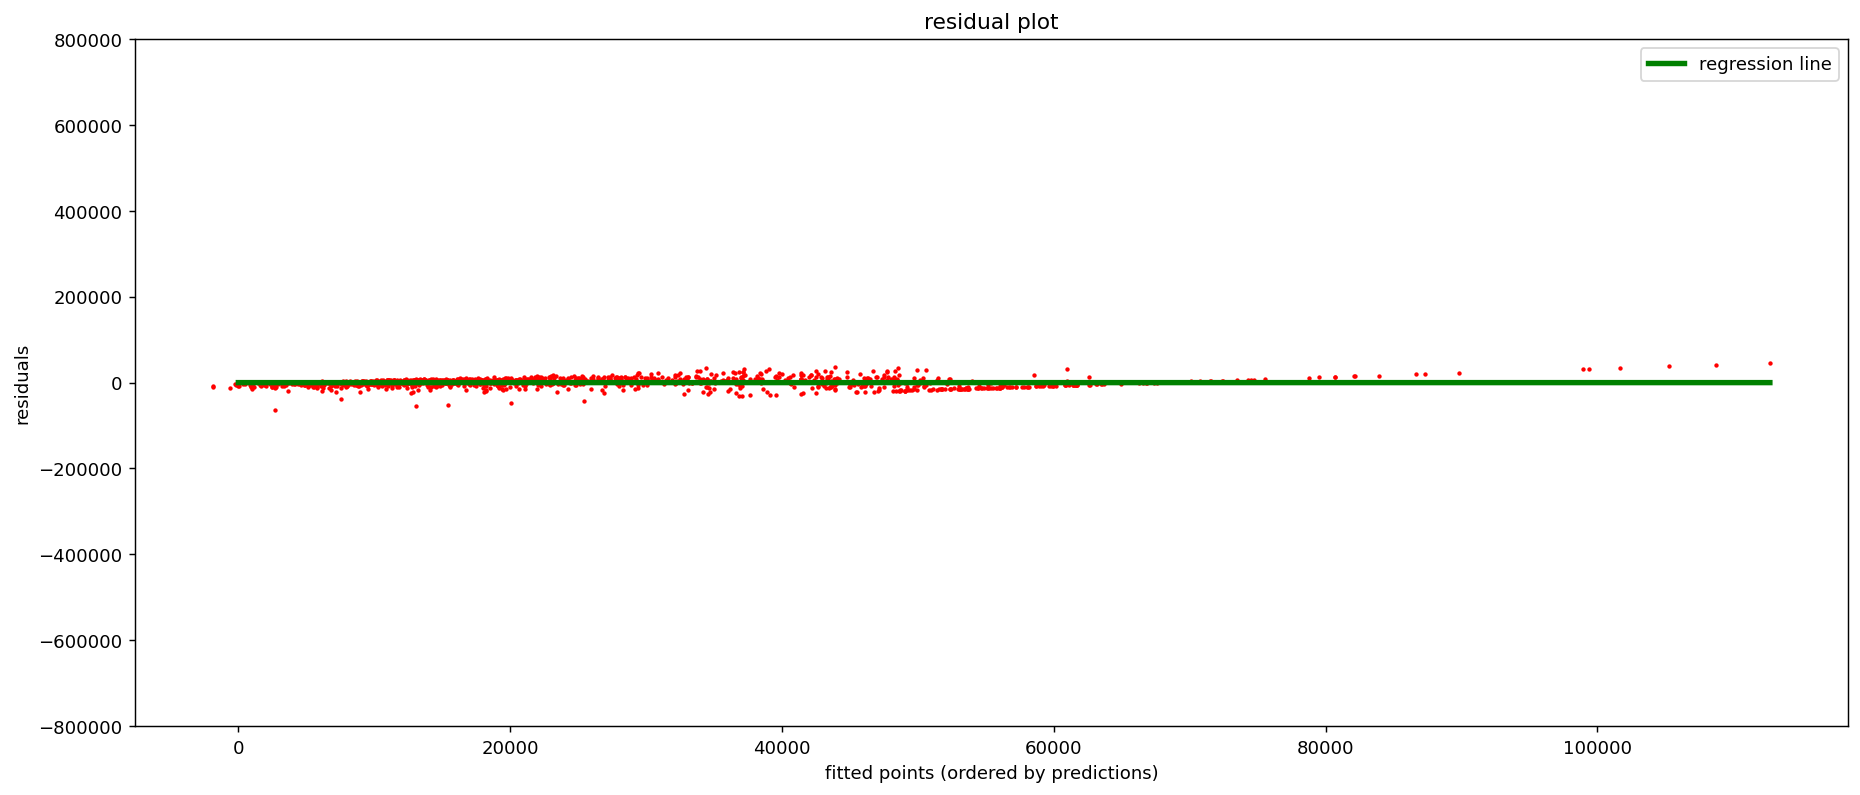

In [123]:
plt.figure(dpi = 130, figsize = (17,7))

plt.scatter( residual_table['predictions'], residual_table['residuals'], color = 'red', s = 2)
plt.plot(z, k, color = 'green', linewidth = 3, label = 'regression line')
plt.ylim(-800000, 800000)
plt.xlabel('fitted points (ordered by predictions)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

## 2. Distribution of errors

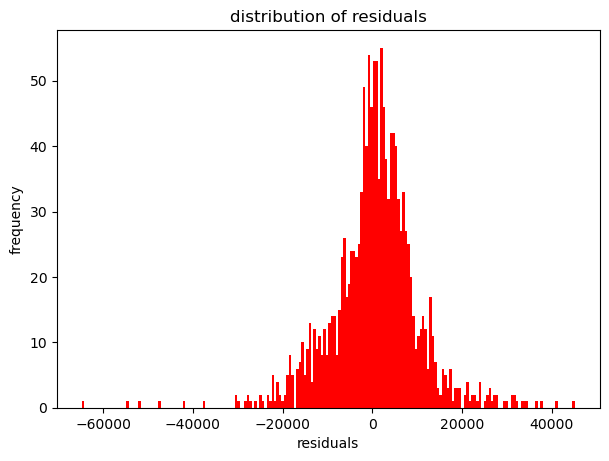

In [125]:
plt.figure(dpi = 100, figsize = (7,5))
plt.hist(residual_table['residuals'], color = 'red', bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

## Model Coefficients

In [126]:
coefficients_table = pd.DataFrame({'column': x_train.columns,
                                  'coefficients': lr.coef_})
coefficient_table = coefficients_table.sort_values(by = 'coefficients')


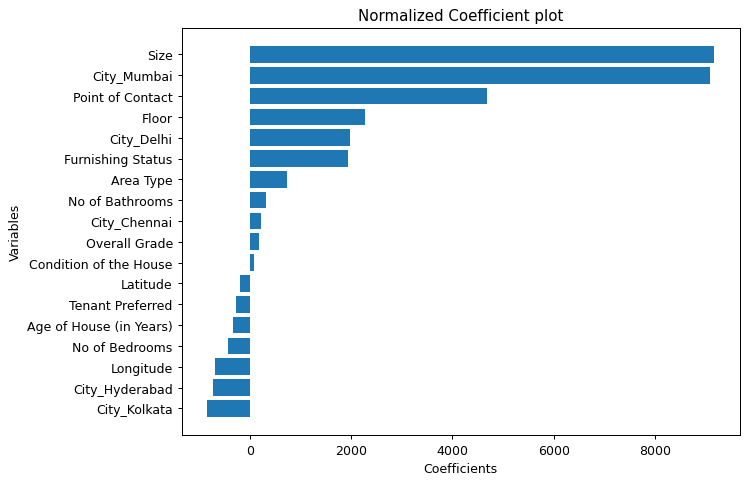

In [127]:
plt.figure(figsize=(8, 6), dpi=90)
x = coefficient_table['column']
y = coefficient_table['coefficients']
plt.barh( x, y)
plt.xlabel( "Coefficients")
plt.ylabel('Variables')
plt.title('Normalized Coefficient plot')
plt.show()